<a href="https://colab.research.google.com/github/mdunand2/2023_Intro_Python/blob/main/ML_EES/IP/W4_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercises) Multivariate linear regression and clustering

What if our dataset has multiple dimensions and we want to find equations that looks something like this?
$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b
$$

Here we show how we would do it with scikit-learn to find a linear equation that describes the Kaggle [Advertising dataset](https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download)

## Exercise 1: Multivariate linear regression

### Q1: Use pandas to import the advertising dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pooch
import urllib.request
import pandas as pd

In [2]:
myadvertising = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EeqnI6nF9iBAkUOACbZ3mWUBDZ8N5mVP1oOaFd4vy6tIzw?download=1',
                          known_hash='69104adc017e75d7019f61fe66ca2eb4ab014ee6f2a9b39b452943f209352010')

In [4]:
# Q1a: Use pandas to import the dataset
mya = pd.read_csv(myadvertising)
# Q1b: Display the first rows of the data with pandas
print(mya.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


### Q2: Try to use scikit-learn linear regression model to predict "Sales" from three columns "TV", "Radio", "Newspaper"

This model will basically tell us how sales would change if we put resources to advertise products in three different medias.

```{hint}
Check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for the `linear-model` module in scikit-learn before you train the model
```

In [12]:
from sklearn.linear_model import LinearRegression

# Construct Input / Output matrices
Xall = mya[['TV','Radio','Newspaper']].values
y = mya['Sales'].values
linreg = LinearRegression()
linreg.fit(Xall, y.reshape(-1,1))

LinearRegression()

### Q3: Print out the linear equation coefficients and intercept

Hints:

(1) When you print the coefficients and intercepts, try to retain only the first two digits. One way to do it is through the `.round()` function in `numpy`

(2) Check out the scikit-learn `linear-model` module for instructions on extracting the coefficients and intercepts of the trained model.


In [18]:
# Print your coefficients and intercept here.
print(f'Coefficients {np.round(linreg.coef_,2)}, Intercept {np.round(float(linreg.intercept_),decimals=2)}' )

Coefficients [[ 0.05  0.19 -0.  ]], Intercept 2.94


## Exercise 2: Clustering Penguin Dataset

In the exercise, we will try to repeat the k-mean clustering procedure introuduced in the tutorial, but on a different 2D variable plane.

Let's try "culmen_length_mm" and "Flipper_length_mm"?

Can we differentiate penguins from the length of the beak and their wings?

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">

In [19]:
penguinsize = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETfy8shC_PtBnsYren_f60UBSyn6Zz1CVvE0Z6_z575VZA?download=1',
                          known_hash='aa728597b2228a2637e39c6f08e40a80971f4cdac7faf7bc21ff4481ee3e3ae9')

penguins = pd.read_csv(penguinsize)
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


### Q1: Data clean up. Remove all rows in the table if the rows contain missing values

Hint: `pandas` has a easy function for data clean up. Check out [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) for details.

In [20]:
penguin_df = penguins.dropna()

### Q2: Create an input dataset `X` with the culmen_length_mm and flipper_length_mm data columns

Hints:

(1) The shape of your input data should be `(334, 2)`

In [38]:
# Create your input for model training here
# Input should contain penguin_df['culmen_length_mm'] and penguin_df['flipper_length_mm']
X = np.vstack((penguin_df['culmen_length_mm'],penguin_df['flipper_length_mm'])).T
print(X)
len(X)

[[ 39.1 181. ]
 [ 39.5 186. ]
 [ 40.3 195. ]
 [ 36.7 193. ]
 [ 39.3 190. ]
 [ 38.9 181. ]
 [ 39.2 195. ]
 [ 41.1 182. ]
 [ 38.6 191. ]
 [ 34.6 198. ]
 [ 36.6 185. ]
 [ 38.7 195. ]
 [ 42.5 197. ]
 [ 34.4 184. ]
 [ 46.  194. ]
 [ 37.8 174. ]
 [ 37.7 180. ]
 [ 35.9 189. ]
 [ 38.2 185. ]
 [ 38.8 180. ]
 [ 35.3 187. ]
 [ 40.6 183. ]
 [ 40.5 187. ]
 [ 37.9 172. ]
 [ 40.5 180. ]
 [ 39.5 178. ]
 [ 37.2 178. ]
 [ 39.5 188. ]
 [ 40.9 184. ]
 [ 36.4 195. ]
 [ 39.2 196. ]
 [ 38.8 190. ]
 [ 42.2 180. ]
 [ 37.6 181. ]
 [ 39.8 184. ]
 [ 36.5 182. ]
 [ 40.8 195. ]
 [ 36.  186. ]
 [ 44.1 196. ]
 [ 37.  185. ]
 [ 39.6 190. ]
 [ 41.1 182. ]
 [ 36.  190. ]
 [ 42.3 191. ]
 [ 39.6 186. ]
 [ 40.1 188. ]
 [ 35.  190. ]
 [ 42.  200. ]
 [ 34.5 187. ]
 [ 41.4 191. ]
 [ 39.  186. ]
 [ 40.6 193. ]
 [ 36.5 181. ]
 [ 37.6 194. ]
 [ 35.7 185. ]
 [ 41.3 195. ]
 [ 37.6 185. ]
 [ 41.1 192. ]
 [ 36.4 184. ]
 [ 41.6 192. ]
 [ 35.5 195. ]
 [ 41.1 188. ]
 [ 35.9 190. ]
 [ 41.8 198. ]
 [ 33.5 190. ]
 [ 39.7 190. ]
 [ 39.6 19

334

### Q3: Train a k-means clustering algorithm, perform elbow test and silhouette analysis

Hints:

(1) The documentation for KMeans clustering can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

(2) [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette+score#sklearn.metrics.silhouette_score) for silhouette score analysis in scikit-learn

In [39]:
# Import KMeans fron scikit-learn
from sklearn.cluster import KMeans
# Import Silhouette score fron scikit-learn
from sklearn.metrics import silhouette_score

In [49]:
# Store the K-means inertia in an empty list
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[75404.08434131736, 20961.06565074627, 13868.78619215541, 9616.284076186497, 7457.831968154624, 6358.780333445622, 5278.899969323596, 4311.424295685189, 3857.50397013387]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

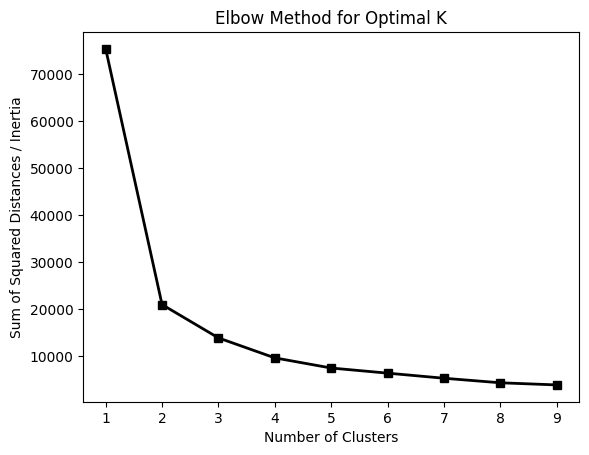

In [42]:
# To finish the elbow method analysis, plot the change in intertia when you change the number of clusters you used to train the k-means clustering algorithm.
plt.plot(K,Sum_of_squared_distances,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances / Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

This is what your TA got after filling in and running the code above.

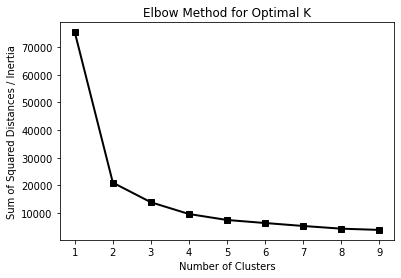

In [46]:
# Import silhouette_score for analysis
from sklearn.metrics import silhouette_score

In [47]:
# Perform silhouette analysis following instructions in the tutorial notebook
silhouette_avg = []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [51]:
print(silhouette_avg)

[0.6123718970795162, 0.4803693736001154, 0.4441765748685956, 0.42640168842132936, 0.4123994242791017, 0.4295524906168745, 0.4061617669514381, 0.3982970507966431]


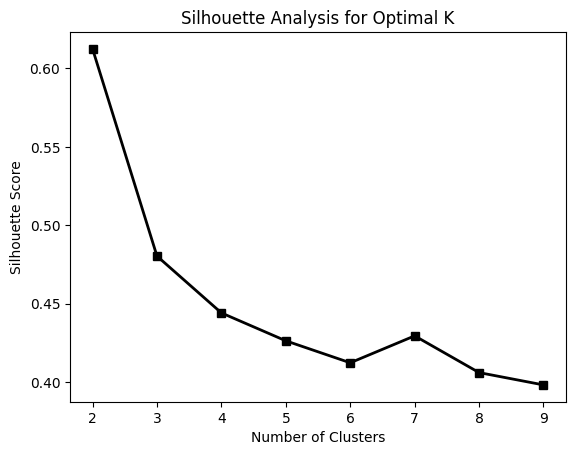

In [48]:
# Plot your silhouette analysis result here.
plt.plot(range(2,10),silhouette_avg,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

Here is a screenshot of how the results should look like.

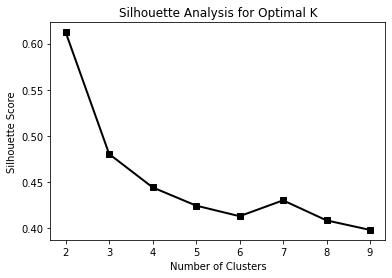

Based on the silhouette and elbow analysis, it seems the either 2 or 3 clusters is suitable for this penguin dataset.

### Q4: Perform KMeans clustering with 3 clusters

In [57]:
# Train a k-means clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Use the model to label all data points
y_kmean = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now, our penguin dataset is labelled. So we can compare our clustering results with the truth to see how well our trained model performed.

First store the predicted labels in the pandas dataframe

In [58]:
penguin_df['label'] = y_kmean

<ipython-input-58-b290df8e26ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_df['label'] = y_kmean


Then extract the culmen_length_mm and flipper_length_mm of the three penguin categories as truth

In [66]:
# Adelie
Ac = penguin_df[penguin_df['species']=='Adelie']['culmen_length_mm']
Af = penguin_df[penguin_df['species']=='Adelie'] ['flipper_length_mm']
# Gentoo
Gc = penguin_df[penguin_df['species']=='Gentoo']['culmen_length_mm']
Gf = penguin_df[penguin_df['species']=='Gentoo'] ['flipper_length_mm']
# Chinstrap
Cc = penguin_df[penguin_df['species']=='Chinstrap']['culmen_length_mm']
Cf = penguin_df[penguin_df['species']=='Chinstrap']['flipper_length_mm']

In [62]:
print(A)

0       True
1       True
2       True
4       True
5       True
       ...  
338    False
340    False
341    False
342    False
343    False
Name: species, Length: 334, dtype: bool


Recreate the figure below

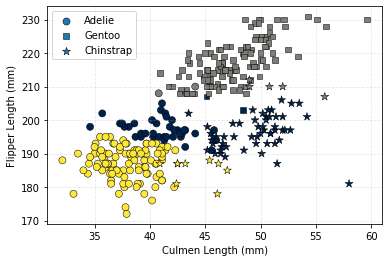

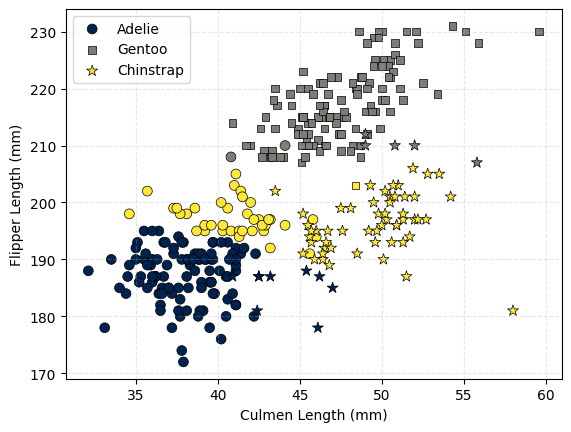

In [67]:
#
plt.scatter(Ac, Af,c=penguin_df[penguin_df['species']=='Adelie']['label'],s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(Gc, Gf,c=penguin_df[penguin_df['species']=='Gentoo']['label'],s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(Cc, Cf,c=penguin_df[penguin_df['species']=='Chinstrap']['label'],s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.legend()
plt.show()

### Q5: Train the KMeans clustering with 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-68-8fc8b9f744a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_df['label'] = y_kmean


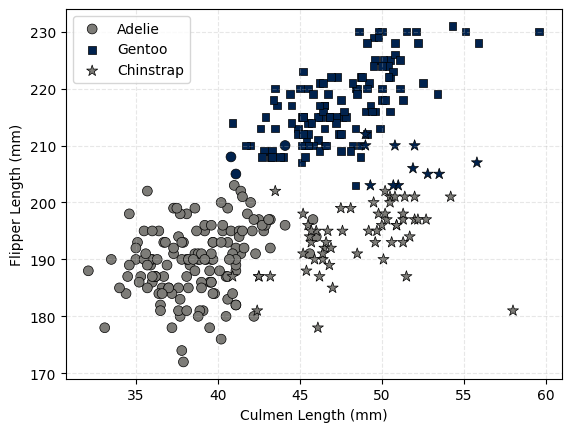

In [68]:
# Train k-means clustering algorithm here
# Train a k-means clustering model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Use the model to label all data points
y_kmean = kmeans.predict(X)

# Predict labels
penguin_df['label'] = y_kmean

# Adelie
Ac = penguin_df[penguin_df['species']=='Adelie']['culmen_length_mm']
Af = penguin_df[penguin_df['species']=='Adelie'] ['flipper_length_mm']
# Gentoo
Gc = penguin_df[penguin_df['species']=='Gentoo']['culmen_length_mm']
Gf = penguin_df[penguin_df['species']=='Gentoo'] ['flipper_length_mm']
# Chinstrap
Cc = penguin_df[penguin_df['species']=='Chinstrap']['culmen_length_mm']
Cf = penguin_df[penguin_df['species']=='Chinstrap']['flipper_length_mm']

plt.scatter(Ac, Af,c=penguin_df[penguin_df['species']=='Adelie']['label'],s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(Gc, Gf,c=penguin_df[penguin_df['species']=='Gentoo']['label'],s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(Cc, Cf,c=penguin_df[penguin_df['species']=='Chinstrap']['label'],s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.legend()
plt.show()



We got this figure with our model. Can you recreate it?

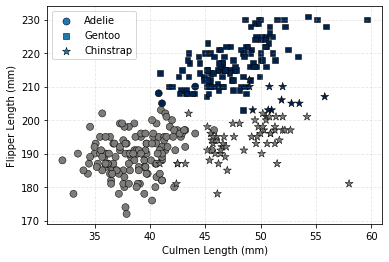